# Assignment 2(due on 11/08)

## Student:余国斌（12332284），Gtihub：yuguobin001

## 批改人：张鹏

## 得分：49/50

### 1 Significant earthquakes since 2150 B.C.

In [1]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [2]:
Sig_Eqs= pd.read_csv('earthquakes-2023-11-01_21-34-28_+0800.tsv', delimiter='\t')
Sig_Eqs.head()

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [3]:
#1.1
Sig_Eqs.groupby(['Country'])['Total Deaths'].sum().sort_values(ascending=False).head(10)

Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

<Axes: xlabel='Year'>

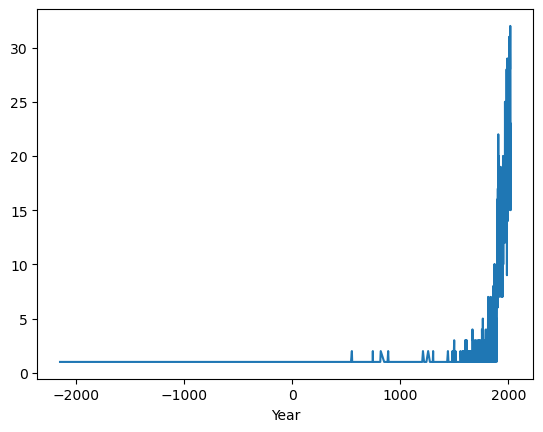

In [4]:
#1.2
Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(Sig_Eqs['Year']).count()['Mag'].plot()

In [5]:
#1.3
def CountEq_LargestEq(country_name):
    country_sel = Sig_Eqs[Sig_Eqs['Country'] == country_name]
    total = len(country_sel)
    
    largest = country_sel[country_sel['Mag'] == country_sel['Mag'].max()]
    largest_date = largest[['Year','Mo','Dy']]   
    result_df = pd.DataFrame({'country': [country_name], 'count': [total], 'largestdate': [largest_date],
                             })   
    return result_df

countries = Sig_Eqs['Country'].unique()
results_df = pd.DataFrame(columns=[])

for country in countries:
    country_df = CountEq_LargestEq(country)
    results_df = pd.concat([results_df, country_df])
    
results_df = results_df.sort_values('count', ascending=False)
results_df

,country,count,largestdate
0,CHINA,620,Year Mo Dy 982 1668.0 7.0 25.0
0,JAPAN,414,Year Mo Dy 5743 2011.0 3.0 11.0
0,INDONESIA,411,Year Mo Dy 5341 2004.0 12.0 26.0
0,IRAN,384,Year Mo Dy 238 856.0 12.0 22.0
0,TURKEY,335,Year Mo Dy 3413 1939.0 12.0 2...
...,...,...,...
0,KIRIBATI,1,Year Mo Dy 2622 1905.0 6.0 30.0
0,PALAU,1,Year Mo Dy 2838 1914.0 10.0 23.0
0,CENTRAL AFRICAN REPUBLIC,1,Year Mo Dy 2964 1921.0 9.0 16.0
0,LIBYA,1,Year Mo Dy 3926 1963.0 2.0 21.0


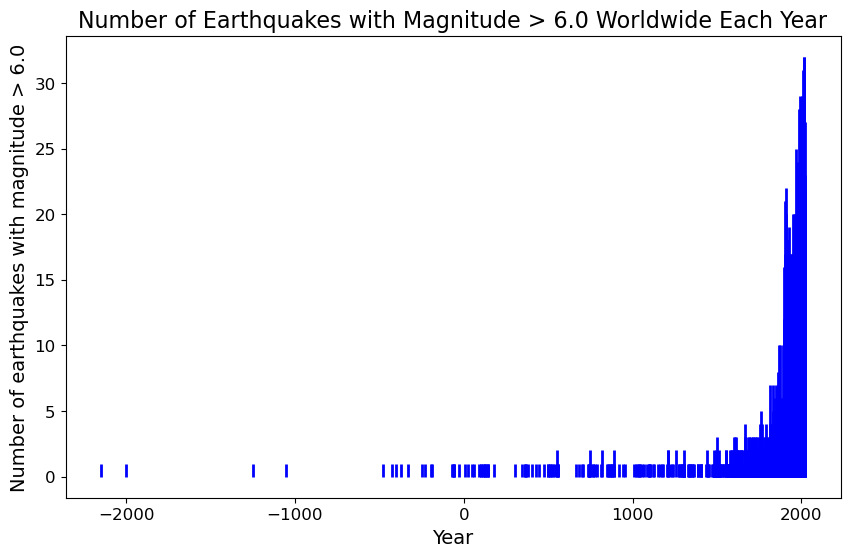

In [22]:
#1.2 助教添加
# 筛选出震级大于6.0的地震
large_quakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析。第二问绘图有一点点问题，建议绘制竖线图，见上面代码助教添加代码


### 得分：24/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

In [6]:
winddata = pd.read_excel('wind.xlsx')
winddata.head(10)

,DATE,direction,directionquality,type,speed,speedquality
0,2010-01-02T00:00:00,40.0,1.0,N,20.0,1.0
1,2010-01-02T01:00:00,999.0,9.0,V,10.0,1.0
2,2010-01-02T02:00:00,999.0,9.0,C,0.0,1.0
3,2010-01-02T03:00:00,140.0,1.0,N,10.0,1.0
4,2010-01-02T04:00:00,300.0,1.0,N,40.0,1.0
5,2010-01-02T05:00:00,320.0,1.0,N,50.0,1.0
6,2010-01-02T06:00:00,270.0,1.0,N,10.0,1.0
7,2010-01-02T07:00:00,350.0,1.0,N,30.0,1.0
8,2010-01-02T08:00:00,360.0,1.0,N,30.0,1.0
9,2010-01-02T09:00:00,40.0,1.0,N,30.0,1.0


In [7]:
winddata['year'] = pd.to_datetime(winddata['DATE']).dt.year
winddata['mon'] = pd.to_datetime(winddata['DATE']).dt.month
winddata.head(10)

,DATE,direction,directionquality,type,speed,speedquality,year,mon
0,2010-01-02T00:00:00,40.0,1.0,N,20.0,1.0,2010.0,1.0
1,2010-01-02T01:00:00,999.0,9.0,V,10.0,1.0,2010.0,1.0
2,2010-01-02T02:00:00,999.0,9.0,C,0.0,1.0,2010.0,1.0
3,2010-01-02T03:00:00,140.0,1.0,N,10.0,1.0,2010.0,1.0
4,2010-01-02T04:00:00,300.0,1.0,N,40.0,1.0,2010.0,1.0
5,2010-01-02T05:00:00,320.0,1.0,N,50.0,1.0,2010.0,1.0
6,2010-01-02T06:00:00,270.0,1.0,N,10.0,1.0,2010.0,1.0
7,2010-01-02T07:00:00,350.0,1.0,N,30.0,1.0,2010.0,1.0
8,2010-01-02T08:00:00,360.0,1.0,N,30.0,1.0,2010.0,1.0
9,2010-01-02T09:00:00,40.0,1.0,N,30.0,1.0,2010.0,1.0


In [8]:
monthly_avg = winddata.groupby(['year', 'mon'])['speed'].mean().unstack()/10
monthly_avg

mon,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year,,,,,,,,,,,,
2010.0,2.756267,3.388060,3.360700,3.191341,3.293640,3.558333,3.575472,2.595430,2.593315,3.589744,2.519553,2.780619
2011.0,3.746289,2.552906,3.096076,2.828452,2.945873,3.482566,3.025538,2.842318,3.156944,2.873144,2.559722,3.381081
2012.0,3.012129,2.867626,2.846995,3.268802,3.391129,3.512500,3.552561,2.764151,2.837500,2.816464,3.287500,3.506720
2013.0,3.094213,2.985119,3.083445,3.115438,3.459184,4.149049,3.711382,3.672131,3.525762,3.294479,3.773250,3.640000
2014.0,3.028777,3.569492,3.088957,3.130252,3.765191,3.607066,3.567054,3.574642,3.297895,3.065856,3.326338,3.739130
2015.0,3.084763,3.159193,2.973737,4.142857,4.199187,4.491137,4.315152,3.271617,3.173867,3.166160,3.209424,3.625510
2016.0,3.435794,3.519423,2.880705,3.211134,3.750253,3.699367,3.862104,3.216049,3.228330,3.702840,3.611702,3.435138
2017.0,2.989680,3.319507,3.059717,3.241851,3.000000,4.386994,3.180061,4.047867,3.082340,4.101420,3.437302,3.842480
2018.0,3.228514,3.052868,3.152130,3.297441,4.033708,3.756785,3.683179,3.107472,3.269412,3.154959,2.825166,3.891481


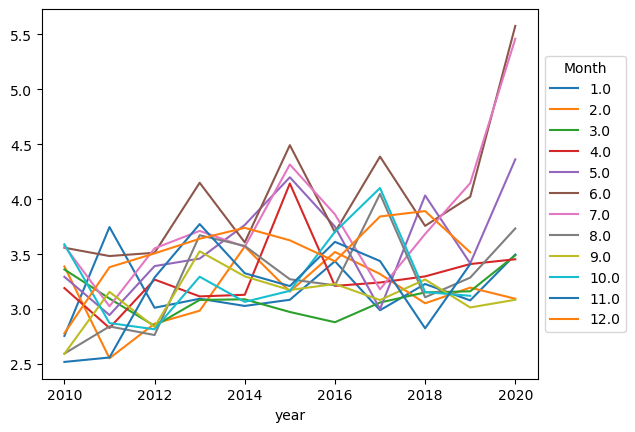

In [9]:
ax = monthly_avg.plot(legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Month') 

### 第二题代码运行正常，可以输出正确结果，额外做出月均风速分析。报告中有代码和文字说明。但没有加入剔除异常值的代码。

### 得分9/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

In [11]:
#3.1
visdata = pd.read_excel('VIS.xlsx')
visdata.head(10) 

,DATE,VIS,DQC,VC,QVC
0,2010-01-02T00:00:00,4000.0,1.0,N,1.0
1,2010-01-02T01:00:00,2600.0,1.0,N,1.0
2,2010-01-02T02:00:00,2600.0,1.0,N,1.0
3,2010-01-02T03:00:00,5000.0,1.0,N,1.0
4,2010-01-02T04:00:00,2100.0,1.0,N,1.0
5,2010-01-02T05:00:00,1800.0,1.0,N,1.0
6,2010-01-02T06:00:00,3000.0,1.0,N,1.0
7,2010-01-02T07:00:00,2000.0,1.0,N,1.0
8,2010-01-02T08:00:00,4600.0,1.0,N,1.0
9,2010-01-02T09:00:00,2000.0,1.0,N,1.0


In [15]:
#3.2
visdata['year'] = pd.to_datetime(visdata['DATE']).dt.year
visdata['mon'] = pd.to_datetime(visdata['DATE']).dt.month
visdata['hour'] = pd.to_datetime(visdata['DATE']).dt.hour
visdata.head(10)

,DATE,VIS,DQC,VC,QVC,year,mon,hour
0,2010-01-02T00:00:00,4000.0,1.0,N,1.0,2010.0,1.0,0.0
1,2010-01-02T01:00:00,2600.0,1.0,N,1.0,2010.0,1.0,1.0
2,2010-01-02T02:00:00,2600.0,1.0,N,1.0,2010.0,1.0,2.0
3,2010-01-02T03:00:00,5000.0,1.0,N,1.0,2010.0,1.0,3.0
4,2010-01-02T04:00:00,2100.0,1.0,N,1.0,2010.0,1.0,4.0
5,2010-01-02T05:00:00,1800.0,1.0,N,1.0,2010.0,1.0,5.0
6,2010-01-02T06:00:00,3000.0,1.0,N,1.0,2010.0,1.0,6.0
7,2010-01-02T07:00:00,2000.0,1.0,N,1.0,2010.0,1.0,7.0
8,2010-01-02T08:00:00,4600.0,1.0,N,1.0,2010.0,1.0,8.0
9,2010-01-02T09:00:00,2000.0,1.0,N,1.0,2010.0,1.0,9.0


<Axes: xlabel='year'>

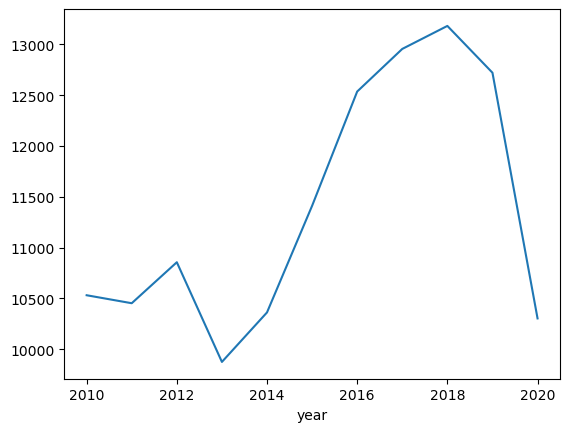

In [16]:
yearVisAvg = visdata.groupby(['year'])['VIS'].mean().plot()
yearVisAvg

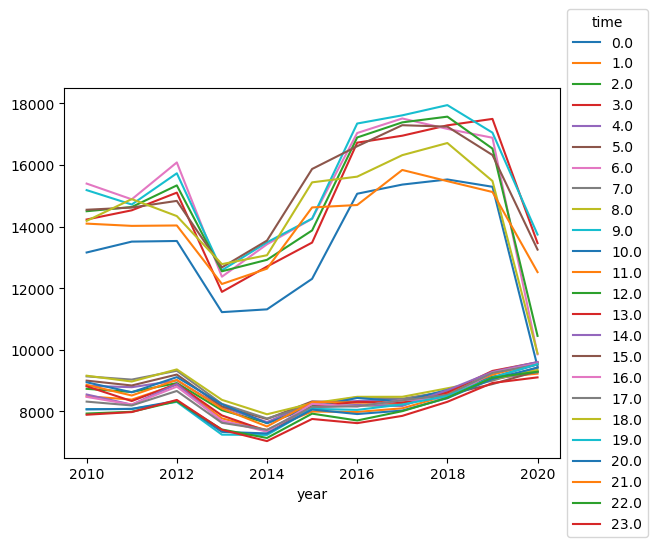

In [17]:
#3.3
hourVisAve = visdata.groupby(['year', 'hour'])['VIS'].mean().unstack()
ax = hourVisAve.plot(legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='time')

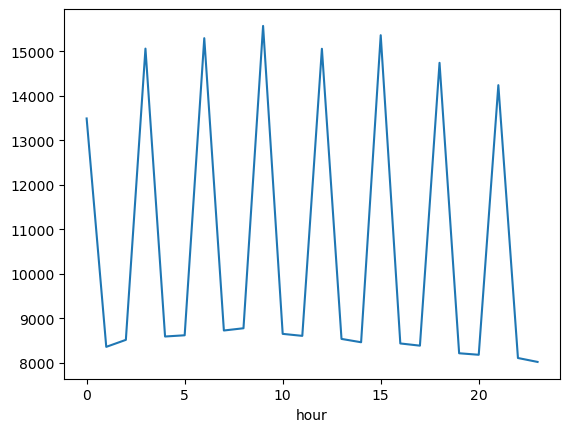

In [18]:
hourVisAve = visdata.groupby(['hour'])['VIS'].mean()
ax = hourVisAve.plot(legend=False)

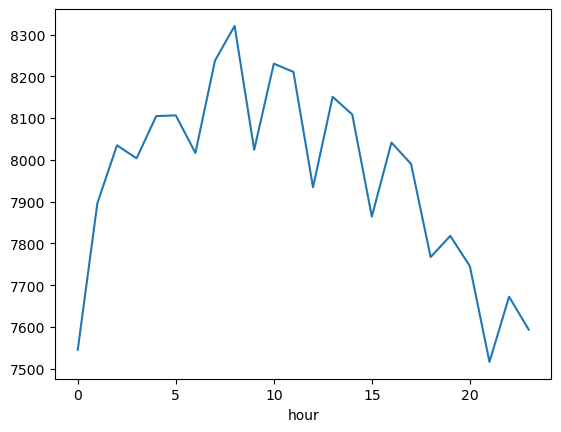

In [19]:
hourVisAve = visdata[visdata['VIS']<10000].groupby(['hour'])['VIS'].mean()
ax = hourVisAve.plot(legend=False)


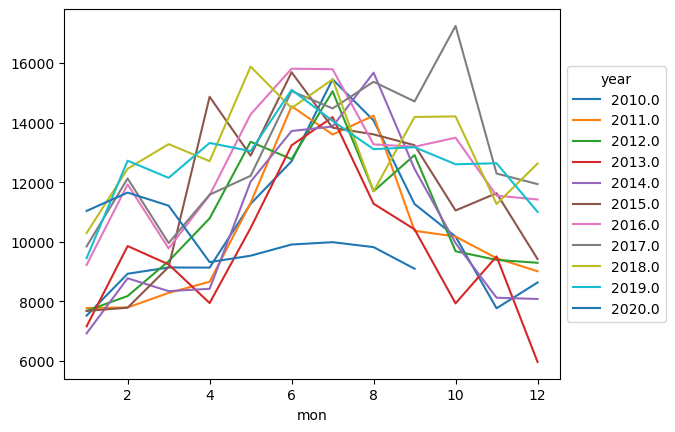

In [20]:
monVisAve = visdata.groupby([ 'mon','year'])['VIS'].mean().unstack()
ax = monVisAve.plot(legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='year')

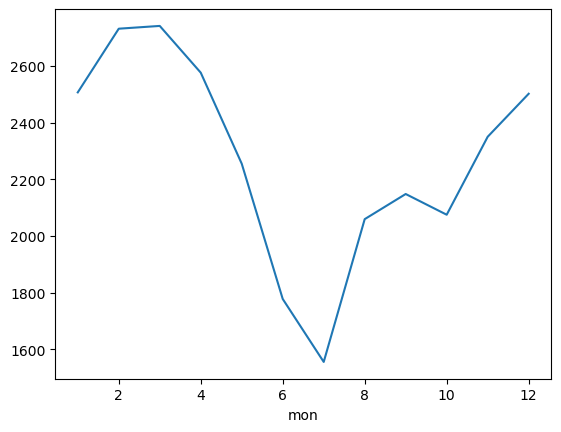

In [21]:
hourVisStd = visdata[visdata['VIS']<10000].groupby(['mon'])['VIS'].std()
ax = hourVisStd.plot(legend=False)

### 第三题代码输出结果正确，也在报告中展现了输出结果和文字说明，对数据分析和解释也正确。建议加上数据筛选的代码
### 得分 15/15
